## **Setup Interpreter**

Some test code that shows how to use **mllibs**

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from mllibs.nlpm import nlpm
from mllibs.nlpi import nlpi
from mllibs.eda.meda_scplot import eda_scplot
from mllibs.eda.meda_splot import eda_splot
from mllibs.stats.mstats_tests import stats_tests
from mllibs.stats.mstats_plot import stats_plot
from mllibs.stats.mstats_general import stats_general
from mllibs.libop.mlibop import libop_general
from mllibs.pd.mpd_dfop import pd_dfop
from mllibs.signal.mfourier_all import fourier_all

# nlpi.activate = False
c = nlpm()
# c.reset_models()
c.load([
	 eda_splot(),     # [eda] standard seaborn plots
	 eda_scplot(),    # [eda] seaborn column plots
	 stats_tests(),   # [stats] statistical tests for list data
	 stats_general(), # [stats] 
	 stats_plot(),    # [stats] visually compare sample distributions
	 libop_general(), # [library] mllibs related functionality
	 pd_dfop(),       # [eda] pandas data exploration 
	 fourier_all()    # [signal] fast fourier transformation related
	])

c.setup()
i = nlpi(c)
i.load_sample_data()
i.data.keys()


[note] initialising nlpm, please load modules using .load(list)
[note] loading modules ...
[note] making module summary labels...
[note] training  [gt] [RandomForestClassifier()] [accuracy,1.0]
[note] using cached ner catboost model
[note] models trained!


dict_keys(['flights', 'penguins', 'taxis', 'titanic', 'dmpg'])

In [3]:
# '''

#     Example for mstats_tests module

# '''

# # store data
# sample1 = list(np.random.normal(scale=1, size=1000))
# sample2 = list(np.random.rand(500))
# sample3 = list(np.random.exponential(scale=1, size=1000))
# sample4 = list(np.random.normal(scale=1, size=1000))
# sample5 = list(np.random.normal(scale=1, size=1000))
# df = pd.DataFrame({'distA':sample1,'distC':sample3,'distD':sample5})

# nlpi.store_data(df,'datas')
# nlpi.store_data({'distrA':sample1,'distrB':sample2})
# nlpi.store_data(sample3,'distrC')

In [13]:
i.store_ac('penguins','selected_columns',['bill_length_mm','bill_depth_mm'])

In [7]:
# i.module.corpus_subset
i.module.corpus_gt

,task,text,class
0,sscatterplot,please create a seaborn scatter plot using ~x ...,0
1,sscatterplot,make a seaborn scatterplot using ~x -column an...,0
2,sscatterplot,create a seaborn scatter plot using ~x -column...,0
3,sscatterplot,create a seaborn scatter plot to visualise the...,0
4,sscatterplot,make a seaborn scatterplot to visualise the re...,0
...,...,...,...
551,jarque_bera_normal,jarque bera normal distribution test using -list,48
552,jarque_bera_normal,for -list test for normal distribution using j...,48
553,jarque_bera_normal,jarque bera test using -list,48
554,jarque_bera_normal,jarque bera test of normal distribution for -list,48


In [3]:
# from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# from sklearn.pipeline import Pipeline
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report

# def create_corpus_sub_model(X,y):

#     '''
	
#     data : dict {'label':[corpus]} format 
	
#     '''

#     # Create a pipeline with CountVectorizer and RandomForestClassifier
#     pipeline = Pipeline([
#     ('vect', CountVectorizer(tokenizer=lambda x: x.split(),ngram_range=(1,3),stop_words=['a','the'],vocabulary=['-column','~x','~y','~hue','~df','-list'])),
#     ('clf', RandomForestClassifier())
#     ])

#     # Fit the pipeline on the training data
#     pipeline.fit(X,y)
#     y_pred = pipeline.predict(X)

#     # Print classification report
#     print(classification_report(y, y_pred))
#     return pipeline

# ls = i.module.corpus_subset['srelplot']
# X,y = ls['text'],ls['label']

# pipeline_ml = create_corpus_sub_model(X,y)
# pp = pipeline_ml.predict_proba(['using data -df create relplot using ~x -column ~y -column'])
# print(pp); print(pp.argmax())
# print(pipeline_ml.classes_)
# pipeline_ml.classes_[pp.argmax()]

In [120]:
# pd.DataFrame({'vocab':list(pipeline_ml['vect'].vocabulary_),
#               'idf':list(pipeline_ml['vect'].idf_)}).sort_values(by='idf',ascending=False)


# word_list = list(pipeline_ml['vect'].vocabulary_.keys())
# counts = list(pipeline_ml['vect'].fit_transform(ls['text']).toarray().sum(axis=0))
# pd.DataFrame({'vocab':word_list,'counts':counts})


In [13]:
i.module_args['column']



def get_nested_list_and_indices(input_list:list):

	'''

	input
	['island', ['bill_length_mm', 'bill_depth_mm']]

	output/return
	Index of nested list: 1
	Indices of rest of the elements: [0, 2]


	'''

	nested_count = 0; str_count = 0
	for i, item in enumerate(input_list):
		if isinstance(item, list) and len(item) == 2:
			nested_count += 1
		elif isinstance(item, str):
			str_count += 1

	if (nested_count > 1):
		print('[note] too much information has been given')

	elif(nested_count == 1):

		for i, item in enumerate(input_list):
			if isinstance(item, list) and len(item) == 2:
				rest_indices = [j for j in range(len(input_list)) if j != i]
				return i, rest_indices		
			elif isinstance(item, list):
				nested_index, rest_indices = get_nested_list_and_indices(item)
				if nested_index is not None:
					return nested_index, rest_indices

	elif(nested_count == 0):

		return None,list(range(len(input_list)))
		

get_nested_list_and_indices(['sex'])

0 1


(None, None)

## **meda_splot**

In [4]:
nlpi.silent = False
i['using data penguins create relplot using x bill_length_mm and y bill_depth_mm for all sex']


##################################################################

[note] extracting parameters from input request!

[note] input request:
using data penguins create relplot using x bill_length_mm
and y bill_depth_mm for all sex

[note] data sources have been found
{'list': [], 'df': ['penguins']}
[note] setting module_args parameters
{'x': 'bill_length_mm', 'y': 'bill_depth_mm'}
extracted [subset] parameters
{'column': ['sex']}

[note] filtered request:
using data -df create relplot using ~x -column ~y -column all -column

##################################################################

[note] found relevant global task [srelplot] w/ [0.63] certainty!
[note] found sub_task [param_defined_col] w/ [0.76] certainty!

[note] module function info
Create a seaborn relation plot using relplot, we can use
columns and rows to show differences in data

None
None


TypeError: 'NoneType' object is not iterable

In [26]:
ls = i.module.corpus_subset['srelplot']
with pd.option_context('display.max_colwidth', None):
	display(ls[ls['label'] == 'xy_column'])



,label,text
18,xy_column,create a seaborn relplot to visualise the relationship between -column and -column
19,xy_column,make a seaborn relplot to visualise the relationship between -column and -column
20,xy_column,how can I visualise the relationship between -column and -column
21,xy_column,can you help me generate a seaborn relplot to display the connection between -column and -column
22,xy_column,using seaborn relplot I want to visualise the association between -column and -column
23,xy_column,i want to plot a graph using seaborn relplot to illustrate the relationship between -column and -column
24,xy_column,i want to visually represent the connection between -column and -column using seaborn relplot
25,xy_column,i would like to plot a graph using seaborn relplot to demonstrate the relationship between -column and -column
26,xy_column,create a seaborn relplot so I can visualise the correlation between -column and -column
27,xy_column,could you provide an example of using lmplot to depict the correlation between -column and -column



##################################################################

[note] extracting parameters from input request!

[note] input request:
using data penguins create relplot using selected_columns
for all island and all sex mew k

[note] data sources have been found
{'list': [], 'df': ['penguins']}
extracted [subset] parameters
{'column': [['bill_length_mm', 'bill_depth_mm'], 'island', 'sex']}

[note] filtered request:
using data -df create relplot using -column for all -column and all -column ~mew k

##################################################################

[note] found relevant global task [srelplot] w/ [0.48] certainty!
[note] found sub_task [xy_column] w/ [0.26] certainty!

[note] module function info
Create a seaborn relation plot using relplot, we can use
columns and rows to show differences in data



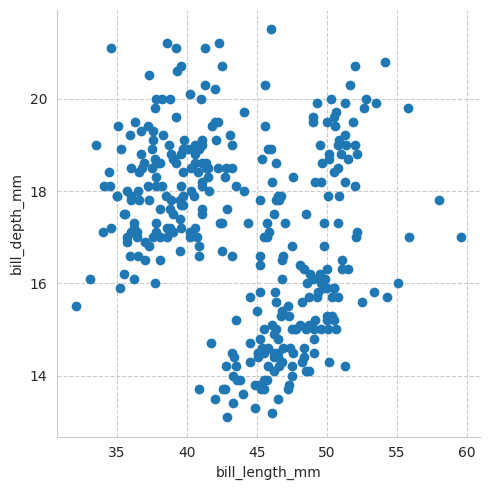

In [47]:
nlpi.silent = False
i['using data penguins create relplot using selected_columns for all island and all sex mew k']

In [17]:
i.modu

[note] setting module_args parameters
{'hue': 'island'}

[note] found relevant global task [srelplot] w/ [0.51] certainty!
[note] found sub_task [param_xy_column] w/ [0.45] certainty!


TypeError: loop of ufunc does not support argument 0 of type NoneType which has no callable sqrt method

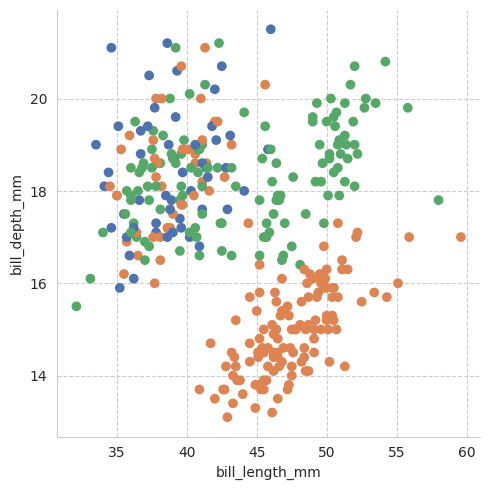

In [17]:
i['using data penguins create a relplot using columns selected_columns set hue as island']

In [28]:
i['using data penguins create a relplot using columns selected_columns set hue as island']

# i['what data is available to me']
# i.setpp({'figsize':[500,900],'template':'plotly_white','title':None})
# nlpi.silent = False

[note] setting module_args parameters
{'hue': 'island'}
[note] found relevant global task [srelplot] w/ [0.39] certainty!
[note] found sub_task [xy_column] w/ [0.71] certainty!


TypeError: list indices must be integers or slices, not NoneType

In [5]:
# nlpi.silent=False
# i['[new_data] as convert a group of lists distrA and distrB into a dataframe and store']

In [27]:
i.store_ac('penguins','selected_columns',['bill_length_mm','bill_depth_mm'])
i.sources()

,name,dtype,shape,ac
name,,,,
flights,flights,<class 'pandas.core.frame.DataFrame'>,"(144, 3)",None
penguins,penguins,<class 'pandas.core.frame.DataFrame'>,"(344, 7)","{'selected_columns': ['bill_length_mm', 'bill_..."
taxis,taxis,<class 'pandas.core.frame.DataFrame'>,"(6433, 14)",None
titanic,titanic,<class 'pandas.core.frame.DataFrame'>,"(891, 15)",None
dmpg,dmpg,<class 'pandas.core.frame.DataFrame'>,"(398, 9)",None
datas,datas,<class 'pandas.core.frame.DataFrame'>,"(1000, 3)",None
distrA,distrA,<class 'list'>,1000,None
distrB,distrB,<class 'list'>,500,None
distrC,distrC,<class 'list'>,1000,None


## **mlibop**

Module used for finding out various information about the library and current statuses

In [10]:
i['show me all the data available to me']

[note] found relevant global task [mlibop_sdata] w/ [0.57] certainty!
[note] currently stored data: 
['flights', 'penguins', 'taxis', 'titanic', 'dmpg', 'datas', 'distrA', 'distrB', 'distrC']


In [11]:
i['what are all the activation functions available to me']

[note] found relevant global task [mlibop_functions] w/ [0.33] certainty!


,module,action,topic,subtopic,input_format,description,output,token_compat,arg_compat,description_sub,task_id,gtask_id,module_id,action_id,topic_id,subtopic_id
sscatterplot,eda_plot,action,exploratory data analysis,plot figure,pd.DataFrame,"make a scatter plot using seaborn, bivariate o...",None,None,x y hue alpha mew mec s,NaN,0,0,0,0,1,8
slmplot,eda_plot,show plot,exploratory data analysis,plot figure,pd.DataFrame,Create a seaborn regression model fit,None,None,x y hue col row,NaN,1,1,0,7,1,8
sboxplot,eda_plot,show plot,exploratory data analysis,plot figure,pd.DataFrame,"Create a seaborn box plot using boxplot, they ...",None,None,x y hue,NaN,2,2,0,7,1,8
sresidplot,eda_plot,show plot,exploratory data analysis,plot figure,pd.DataFrame,Create a seaborn residual plot,None,None,x y,NaN,3,3,0,7,1,8
sviolinplot,eda_plot,show plot,exploratory data analysis,plot figure,pd.DataFrame,Create a seaborn violin plot,None,None,x y hue,NaN,4,4,0,7,1,8


[note] data stored in nlpi.memory_output; call .glr()['data']


## **mpd_dfop**

Module for doing various basic operations using a dataframe as the data source

### using entire dataframe

In [7]:
i['show the column names in the dataframe titanic']

[note] found relevant global task [dfcolumninfo] w/ [0.64] certainty!
Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [8]:
i['show the shape of the dataframe titanic']

[note] found relevant global task [dfsize] w/ [0.58] certainty!
(891, 15)


In [9]:
i['show the statistics of dataframe datas']

[note] found relevant global task [gstat_stats] w/ [0.77] certainty!
[note] found sub_task [dataframe_inputs] w/ [0.81] certainty!


,distA,distC,distD
count,1000.000000,1000.000000,1000.000000
mean,0.047341,1.024208,0.012426
std,0.991167,1.048262,0.963727
min,-3.169587,0.000990,-3.034623
25%,-0.660322,0.271074,-0.646035
50%,0.038107,0.729374,0.005098
75%,0.721276,1.401310,0.661896
max,3.284409,9.831025,3.454254


In [10]:
i['show the dataframe information for titanic']

[note] found relevant global task [show_info] w/ [0.86] certainty!
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB
None


In [11]:
i['show the correlation of columns in the dataframe titanic']

[note] found relevant global task [show_corr] w/ [0.51] certainty!


,survived,pclass,age,sibsp,parch,fare
survived,1.00,-0.34,-0.08,-0.04,0.08,0.26
pclass,-0.34,1.00,-0.37,0.08,0.02,-0.55
age,-0.08,-0.37,1.00,-0.31,-0.19,0.10
sibsp,-0.04,0.08,-0.31,1.00,0.41,0.16
parch,0.08,0.02,-0.19,0.41,1.00,0.22
fare,0.26,-0.55,0.10,0.16,0.22,1.00


In [12]:
i['show the missing data in the dataframe titanic']

[note] found relevant global task [dfna_all] w/ [0.7] certainty!
869 rows in total have missing data
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64
[note] I've also stored the missing rows!


In [3]:
i['show the column distributions for the dataframe titanic']

[note] found relevant global task [dfcolumn_distr] w/ [0.85] certainty!
[note] found sub_task [all] w/ [0.98] certainty!
{'survived': {0: 549, 1: 342}, 'pclass': {3: 491, 1: 216, 2: 184}, 'sex': {'male': 577, 'female': 314}, 'age': {24.0: 30, 22.0: 27, 18.0: 26, 19.0: 25, 28.0: 25, 30.0: 25, 21.0: 24, 25.0: 23, 36.0: 22, 29.0: 20, 32.0: 18, 35.0: 18, 27.0: 18, 26.0: 18, 16.0: 17, 31.0: 17, 20.0: 15, 34.0: 15, 33.0: 15, 23.0: 15, 39.0: 14, 40.0: 13, 17.0: 13, 42.0: 13, 45.0: 12, 38.0: 11, 50.0: 10, 2.0: 10, 4.0: 10, 44.0: 9, 48.0: 9, 47.0: 9, 54.0: 8, 9.0: 8, 1.0: 7, 51.0: 7, 14.0: 6, 52.0: 6, 37.0: 6, 49.0: 6, 41.0: 6, 3.0: 6, 58.0: 5, 15.0: 5, 43.0: 5, 62.0: 4, 56.0: 4, 5.0: 4, 11.0: 4, 60.0: 4, 8.0: 4, 6.0: 3, 46.0: 3, 61.0: 3, 65.0: 3, 7.0: 3, 10.0: 2, 64.0: 2, 13.0: 2, 63.0: 2, 30.5: 2, 57.0: 2, 70.0: 2, 0.75: 2, 71.0: 2, 59.0: 2, 0.83: 2, 40.5: 2, 55.0: 2, 32.5: 2, 28.5: 2, 45.5: 2, 34.5: 1, 0.42: 1, 0.67: 1, 66.0: 1, 24.5: 1, 80.0: 1, 20.5: 1, 53.0: 1, 14.5: 1, 70.5: 1, 12.0: 1, 

In [4]:
i['show all the unique values in all columns in dataframe titanic']

[note] found relevant global task [dfcolumn_unique] w/ [0.94] certainty!
[note] found sub_task [all] w/ [0.8] certainty!
survived ([0 1])
pclass ([3 1 2])
sex (['male' 'female'])
age ([22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ])
sibsp ([1 0 3 4 2 5 8])
parch ([0 1 2 5 3 4 6])
fare ([  7.25    71.2833   7.925   53.1      8.05     8.4583  51.8625  21.075
  11.1333  30.0708  16.7     26.55    31.275    7.8542  16.      29.125
  13.      18.       7.225   26.       8.0292  35.5     31.3875 263.
   7.8792   7.8958 

In [6]:
i['show the data types of the dataframe titanic']

[note] found relevant global task [show_dtypes] w/ [0.52] certainty!
survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
embarked         object
class          category
who              object
adult_male         bool
deck           category
embark_town      object
alive            object
alone              bool
dtype: object


### using a subset of dataframe

In [5]:
i['show the column distributions for the dataframe titanic for the column class']

[note] found relevant global task [dfcolumn_distr] w/ [0.84] certainty!
[note] found sub_task [subset] w/ [0.83] certainty!


,values,percentage
class,,
Third,491,55.11
First,216,24.24
Second,184,20.65


In [6]:
i['show all the unique values of columns class and deck in dataframe titanic']

[note] found relevant global task [dfcolumn_unique] w/ [0.79] certainty!
[note] found sub_task [few] w/ [0.88] certainty!
class (['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third'])
deck ([NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G'])


In [7]:
i['show the unique values in column class in the dataframe titanic']

[note] found relevant global task [dfcolumn_unique] w/ [0.75] certainty!
[note] found sub_task [one] w/ [0.81] certainty!
['Third', 'First', 'Second']
Categories (3, object): ['First', 'Second', 'Third']


### **mstats_tests**

Module for conducting different statistical tests using lists as data input

In [3]:
# independent student ttest (can be different sizes)
i['compare the means of two lists distrA distrB using indepentent student ttest']

[note] found relevant global task [its_ttest] w/ [0.71] certainty!
t-statistic: -10.870116673417579
pvalue: 1.52126204409536e-26
Reject the null hypothesis : there is a significant difference between the two groups.


In [3]:
# dependent student ttest (must be same list size)
i['compare the means of two lists distrA and distrB using dependent students ttest']

[note] found relevant global task [p_ttest] w/ [0.65] certainty!
[note] Both data sources must have the same length


In [5]:
# one sample ttest, compare to population mean
i['do a single sample ttest of data distrA and set popmean 0.04']

[note] setting module_args parameters
{'popmean': 0.04}
[note] found relevant global task [os_ttest] w/ [0.99] certainty!
t-statistic: -2.1760398467163435
pvalue: 0.029786017438597285
Reject the null hypothesis: The mean is significantly different from 0.04


In [6]:
# Mann Whitney U-Test
i['mann whitney utest for dataset distrB and distrA']

[note] found relevant global task [utest] w/ [0.64] certainty!
u statistic: 344114.0
pvalue: 1.1756331059711802e-32
Reject null hypothesis : There is a significant difference between the two samples.


In [4]:
# Kolmogorov Smirnov Test for normality 
i['ks test for normality using dataset distrA']

[note] found relevant global task [ks_sample_normal] w/ [0.76] certainty!
ks statistic: 0.019729512414273676
pvalue: 0.823609228617101
Fail to reject the null hypothesis: Data follows a normal distribution.


In [5]:
# Kolmogorov Smirnov test for uniformity
i['please check the dataset distrB for uniformity using the ks test']

[note] found relevant global task [ks_sample_uniform] w/ [0.76] certainty!
ks statistic: 0.04071333769268182
pvalue: 0.36868403272860995
Fail to reject the null hypothesis: Data follows a uniform distribution.


In [7]:
# Kolmogorov Smirnov test for exponentiality
i['using the ks test check the dataset distrC if it is of exponential nature']

[note] found relevant global task [ks_sample_exponential] w/ [0.63] certainty!
ks statistic: 0.024946927331203073
pvalue: 0.5537745774875409
Fail to reject the null hypothesis: Data follows an exponential distribution.


In [5]:
# Lilliefors test for normality
i['using the lilliefors statistical test check distrA for normality']

[note] found relevant global task [lilliefors_normal] w/ [0.62] certainty!
Lilliefors statistic: 0.03349011749910802
pvalue: 0.015498564953545658
Reject the null hypothesis : The data is not likely to be normally distributed.


In [5]:
# One way ANOVA test 
i['one way anova test to check if there is any difference between distrA distrB distrC']

[note] found relevant global task [oneway_anova] w/ [0.44] certainty!
statistic: 333.6250824545146
pvalue: 3.880986066237367e-129
Reject the null hypothesis: The means of the groups are not equal


In [13]:
# Chi2 
i['chi2 statistical test for distrA and distrC']

[note] found relevant global task [chi2_test] w/ [0.69] certainty!
chi2 statistic: 7277.966020562606
pvalue: 0.0
Reject the null hypothesis : The observed frequencies are significantly different from the expected frequencies.


### **mstats_plot**

Module for comparing visually the distribution of different subsets

[note] setting module_args parameters
{'nbins': 100}
[note] found relevant global task [dp_hist] w/ [0.62] certainty!
['mlist']
{'list': ['distrB', 'distrC', 'distrA'], 'df': []}
{'distrB': 'list', 'distrC': 'list', 'distrA': 'list'}


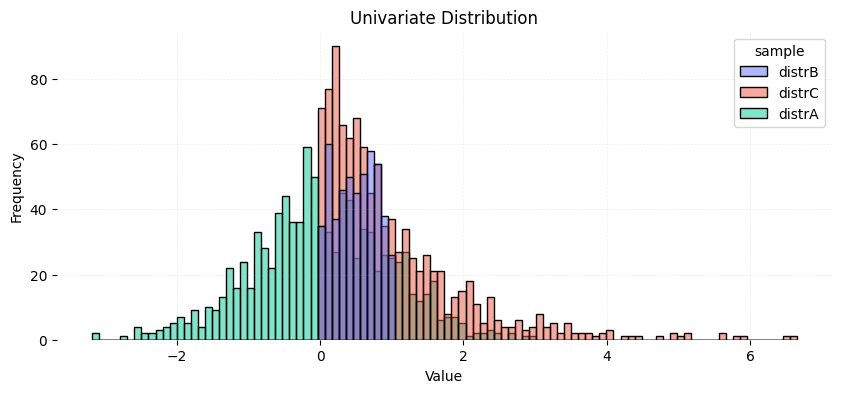

In [8]:
# plot the histogram distribution for different lists
i["compare the histograms of two samples distrB, distrC and distrA set nbins 100"] # dp_hist

[note] found relevant global task [dp_kde] w/ [0.32] certainty!
['mlist']
{'list': ['distrA', 'distrB', 'distrC'], 'df': []}
{'distrA': 'list', 'distrB': 'list', 'distrC': 'list'}


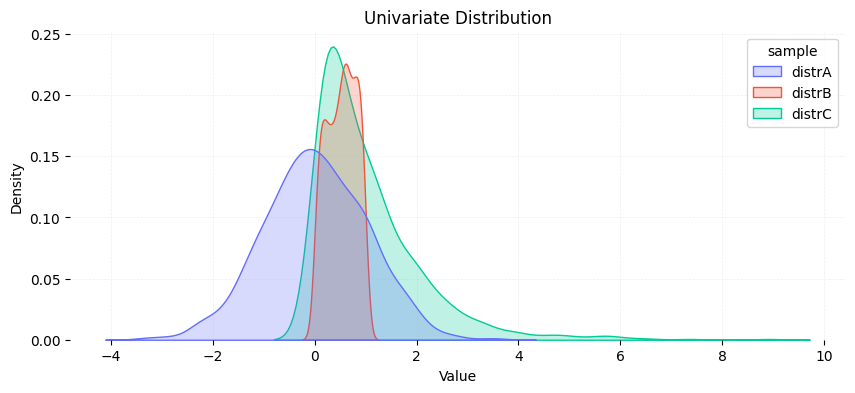

In [3]:
i["compare the distribution of two datasets distrA distrB and distrC using a kernel density plot"]

[note] found relevant global task [dp_box] w/ [0.83] certainty!


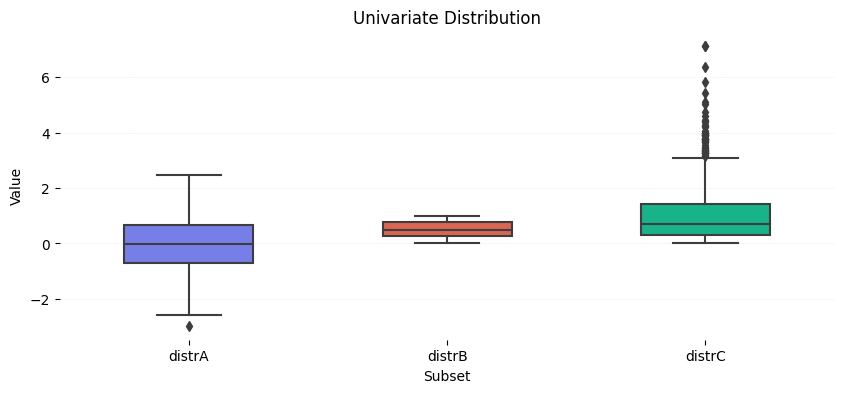

In [3]:
i['compare the boxplot distribution for datasets distrA distrB and distrC']

[note] found relevant global task [dp_ecdf] w/ [0.75] certainty!


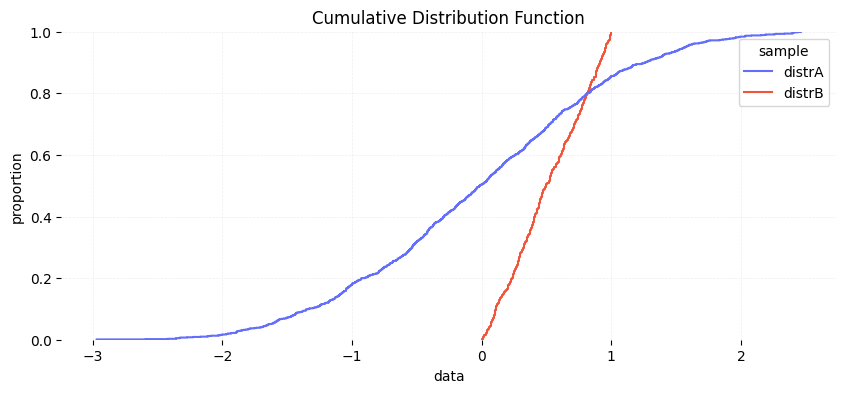

In [4]:
i['please plot the cumulative distribution functions for data distrA and distrB']

### **mstats_general**

In [6]:
i['show the general statistics for distrA distrB and distC']

[note] found relevant global task [gstat_stats] w/ [0.91] certainty!
[note] found sub_task [list_inputs] w/ [0.89] certainty!


sample,distrA,distrB,distrC
count,1000.000000,500.000000,1000.000000
mean,-0.023505,0.514057,1.039609
std,0.975247,0.286095,1.026327
min,-2.971711,0.002613,0.000059
25%,-0.690158,0.282936,0.305433
50%,-0.015008,0.495356,0.699308
75%,0.665670,0.768603,1.440745
max,2.463727,0.999680,7.136883


In [3]:

# i.store_ac('penguins','selected_columns',['bill_length_mm','bill_depth_mm'])

# ldata = nlpi.data['iris']['data']
# train,test = train_test_split(ldata)
# interpreter.store_data({'train':train,'test':test})

# breast cancer data
cols = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
	   'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
	   'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
	   'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
	   'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
	   'fractal_dimension_se', 'radius_worst', 'texture_worst',
	   'perimeter_worst', 'area_worst', 'smoothness_worst',
	   'compactness_worst', 'concavity_worst', 'concave points_worst',
	   'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']

df = pd.read_csv("https://raw.githubusercontent.com/akshaybahadur21/BreastCancer_Classification/master/breast_cancer/cancer_data.csv",
				 names = cols)
i.store_data({'breast_data':df})

# # customer review data
# df = pd.read_csv('https://raw.githubusercontent.com/shtrausslearning/Data-Science-Portfolio/main/sources/customer_reviews.csv',sep=',')
# i.store_data({'reviews_data':df})

# # customer funds data
# df = pd.read_csv('https://raw.githubusercontent.com/shtrausslearning/Data-Science-Portfolio/main/sources/funds_data.csv',delimiter=';')
# i.store_data({'customerfunds_data':df})

# df = pd.read_csv('https://raw.githubusercontent.com/shtrausslearning/Data-Science-Portfolio/main/sources/stocks.csv',delimiter=',')
# i.store_data({'stocks':df})
# i.store_ac('penguins','selected_columns',['bill_length_mm','bill_depth_mm'])

# df = pd.read_csv('https://raw.githubusercontent.com/shtrausslearning/Data-Science-Portfolio/main/sources/iris.csv',delimiter=',')
# i.store_data({'iris_data':df})

In [14]:
aa = pd.DataFrame({'a':[1,2,3,4],'b':[2,3,4,5]})
if(aa is not None):
	print(aa)

   a  b
0  1  2
1  2  3
2  3  4
3  4  5


In [4]:
print(i.module_args['data'])
print(i.module_args['hue'])
print(i.module_args['column'])

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
3    Adelie  Torgersen             NaN            NaN                NaN   
4    Adelie  Torgersen            36.7           19.3              193.0   
..      ...        ...             ...            ...                ...   
339  Gentoo     Biscoe             NaN            NaN                NaN   
340  Gentoo     Biscoe            46.8           14.3              215.0   
341  Gentoo     Biscoe            50.4           15.7              222.0   
342  Gentoo     Biscoe            45.2           14.8              212.0   
343  Gentoo     Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
0         3750.0    Male  
1         3800.0  Female  
2     

### **meda_splot**

#### **srelplot**

In [5]:
i.module_args['data']

{'list': [], 'df': ['penguins']}

In [5]:
i.module_args['column']

['bill_length_mm', 'bill_depth_mm']

In [26]:
i.module_args['column']

In [3]:
i["create a seaborn relplot to visualise the relationship between bill_depth_mm and bill_length_mm using penguins"]
# i['create a seaborn relplot to visualise the relationship between bill_depth_mm and bill_length_mm for each island using penguins']

[note] found relevant global task [srelplot] w/ [0.7] certainty!
[note] found sub_task [xy_column] w/ [0.9] certainty!


ValueError: Could not interpret value `b` for parameter `x`

In [4]:
i.module_args['column']

['bill_depth_mm', 'bill_length_mm']

In [16]:
'''

	Specify columns names for x and y 

'''

i['using data penguins create a relplot using columns bill_length_mm and bill_depth_mm also set hue as island']

[note] setting module_args parameters
{'hue': 'island'}
[note] found relevant global task [srelplot] w/ [0.45] certainty!
[note] found sub_task [xy_column] w/ [0.44] certainty!


ValueError: Could not interpret value `b` for parameter `x`

[note] setting module_args parameters
{'hue': 'island'}
[note] found relevant global task [srelplot] w/ [0.44] certainty!
[note] found sub_task [xy_column] w/ [0.65] certainty!


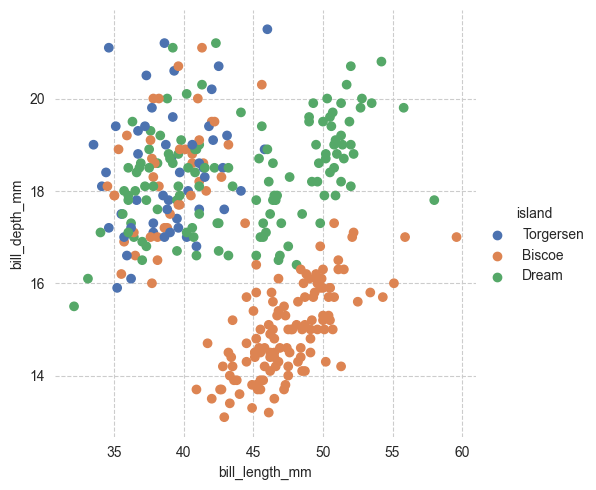

In [27]:
'''

	Specify columns names for x and y ( + utilise active column name )

'''

i.store_ac('penguins','selected_columns',['bill_length_mm','bill_depth_mm'])
i['using data penguins create a relplot using columns selected_columns set hue as island']

In [28]:
i.module_args['column']

[['bill_length_mm', 'bill_depth_mm']]

In [6]:
# i['show a dataset preview for data iris']
# i['what columns are available in data penguins']
# i['show me all the available data names']
# i['using data penguins create a relplot using columns bill_length_mm and flipper_length_mm']
i['using data penguins create a relplot using columns selected_columns set hue as island']

# i['what data is available to me']
# i.setpp({'figsize':[500,900],'template':'plotly_white','title':None})
# nlpi.silent = False

# i.store_ac('iris','ac_column',['petal_length','petal_width'])
# i.store_ac('iris','ac_column2',['petal_length','petal_width'])
# i['create a plotly scatterplot using x sepal_length and y petal_length petal_width using iris set s 7 col species']
# i['create a plotly scatterplot using x sepal_length and y ac_column using iris set s 7 col species']
# i['create a plotly scatterplot using iris and columns x petal_length y petal_width sepal_length set s 7']
# i['create a plotly scatterplot using iris for petal_length and petal_width for all species set s 7']
# i['create a plotly scatterplot using iris for petal_length and petal_width for all species and sex set s 7']
# i['create a plotly scatterplot using penguins plotting the relation between bill_length_mm and bill_depth_mm set s 6 mew 1 mec black']
# i['create a plotly scatterplot using x sepal_length and y  using iris set s 7 col species']

# i['show all the column names in dataset breast_data']
# i['show the dataframe head data for breast_data']
# i['show the dataframe preview for breast_data']
# i['create plotly scatter plot x bill_length_mm y flipper_length_mm col sex using penguins data']

# i['what data is avaialable to me']
# i['show a preview of dataframe penguins']

# "in data breast_data convert column diagnosis to a string format"
# i.setpp({'figsize':[700,400],'template':'plotly_white','title':None})
# nlpi.silent=True

# i['create a seaborn histogram plot of x radius_worst and hue diagnosis using breast_data nbins 20 barmode stack alpha 0.5']
# i['create a seaborn histogram plot of x radius_worst and hue diagnosis using breast_data nbins 20 barmode stack alpha 0.5']
# i['create a seaborn relplot using x radius_worst and y symmetry_mean using breast_data set col diagnosis mew 1 mec k s 25']
# i['with breast_data please create a relplot using radius_worst and symmetry_mean setting col diagnosis s 20']
# i['with breast_data please create a relplot using radius_worst and radius_mean setting col diagnosis s 20']

# i['create a seaborn relplot using x bill_length_mm and y flipper_length_mm using penguins set hue island mew 1 mec k s 40 col island']
# i['with dataset penguins please create a seaborn relplot using x as bill_length_mm and y as flipper_length_mm'] # as : remove stop or extend reach of window for [~] 
# i['with dataset penguins please create a seaborn relplot using x bill_length_mm y flipper_length_mm']

# i.module_args['col']

# filtered ls3
# create a seaborn relplot between -column and -column using -data for all -column
# create a seaborn relplot between -column -column and -column -column using -data for all -column -column ~s -value


# i['show the dataframe information for stocks']
# i['show me what data is available']
# i['show the missing data in terms of percentage in titanic']
# i['show how much data is missing in titanic']
# i['show how much data is missing in titanic']
# i['show the percentage of data missing in titanic']
# i['what is ther percentage of missing rows in titanic']
# i['how many rows are missing in data titanic, in terms of percentage']
# i['does the data titanic contain missing data']
# i['show a dataframe preview of data titanic']


##################################################################

[note] extracting parameters from input request!

[note] input request:
using data penguins create a relplot using columns
selected_columns set hue island

[note] data sources have been found
{'data': 'penguins'}
[note] parameters found!
[note] setting module_args parameters
{'hue': 'island'}

[note] filtered request:
using data -data create a relplot using columns selected_columns set ~hue -column

##################################################################

[note] found relevant global task [srelplot] w/ [0.28] certainty!


ValueError: The following variable cannot be assigned with wide-form data: `hue`

In [9]:
nlpi.data['penguins']['splits_col']

{}

In [2]:
# nlpi.silent = False
# i.setpp({'figsize':[10,4],'title':None,'bw':0.35})
# i['for all columns create a seaborn kernel density plot using penguins set hue island']
# i['for all columns create a seaborn boxplot using penguins set x island']
# i['for all columns in penguins create a kernel density plot set x island set hue island']
# i['for all penguins data and all columns create column seaborn scatterplot for parameter x body_mass_g s 15 mew 1 mec k']
# i['for all penguins data and columns bill_length_mm bill_depth_mm flipper_length_mm create column seaborn scatterplot for parameter x body_mass_g s 30 mew 1 mec k set hue island']

# i.setpp({'figsize':[600,800],'title':None})
# query = """create a seaborn scatterplot using columns age fare using titanic"""; i[query]

In [6]:
# i.setpp({'figsize':[600,800],'template':'plotly_white','title':None})
# nlpi.silent = False

# collection.ner_identifier['tfidf'].vocabulary_
# nlpi.memory_output[-1]['ohe_data']
# i['show a preview of data titanic']
# nlpi.silent = True
# i["show me the column distribution of island and sex in penguins"]
# interpreter['show the dataframe information for stocks']
# interpreter['describe the dataframe stocks']

# i['show me what data is available']
# i['show the missing data in terms of percentage in titanic']
# i['show how much data is missing in titanic']
# i['in dataset titanic show the percentage of data missing']
# i['what is the percentage of missing rows in titanic']
# i['how many rows are missing in data titanic, in terms of percentage']
# i['does the data titanic contain missing data']
# i["using data penguins, create a plotly scatter plot using parameters x body_mass_g y bill_depth_mm and hue island set mew 1.8"]
# i['show the column distribution of feature island in data penguins']
# i.query('show a preview of dataframe breast_data')
# i['show the column distribution of species in data penguins']
# i['in data breast_data convert column diagnosis to a string format']

In [3]:
# # plot plotly scatterplot

# i.setpp({'figsize':[500,800],'template':'plotly_white','title':'title'})
# nlpi.silent = False

# # i['plot a seaborn scatterplot using parameters x: radius_mean y: concavity_mean using data breast_data hue diagnosis s: 20 mew: 1 mec: k']
# # i['plot a plotly scatterplot using parameters x: radius_mean y: concavity_mean using data breast_data hue diagnosis mec: black s: 7 mew: 1.5']
# # i['with data penguins plot a plotly scatterplot using parameters x: bill_length_mm y: flipper_length_mm and hue: island']
# # i['with data penguins plot a seaborn lmplot using parameters x: bill_length_mm y: flipper_length_mm col: island hue: sex']
# # i['with data penguins create a seaborn boxplot using parameters y: island x: flipper_length_mm hue: sex']
# # i['with data penguins create a seaborn violin plot using parameters y: island x: flipper_length_mm hue: sex']
# # i['select data penguins and create a seaborn boxplot using parameters y: island x: flipper_length_mm hue: sex']

# params = "using data penguins and x: flipper_length_mm"

# i[f'create a seaborn kernel density plot {params}']

In [7]:
# i['show the columns available in stocks']

In [8]:
# i['visualise a plotly scatter plot using x date and y AMZN NFLX using data stocks']
# nlpi.silent = False
# i['Tell me the shape of the dataframe stocks']

In [10]:
# df = nlpi.data['stocks']['data']
# df.head()

[note] found relevant global task [sig_fourierplot] w/ [0.51] certainty!


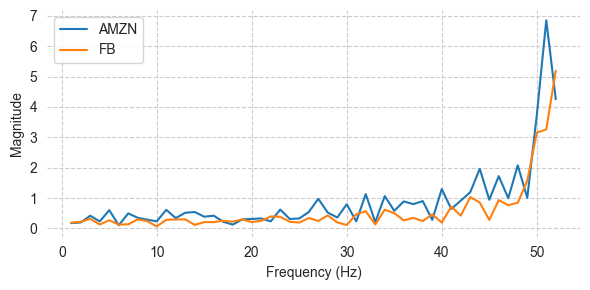

In [5]:
i.setpp({'figsize':[6,3],'template':'plotly_white','title':None})
nlpi.silent = True

# interpreter['generate one hot encoding of column sex island using penguins']
# nlpi.silent = False

# store column names for a particular dataset
# i.store_ac('penguins','ohe_columns',['sex','island'])
										
# i['generate one hot encoding of column {ohe_columns} using penguins']
# i['generate one hot encoding of columns island in data penguins']
# i['please generate the fft for column passengers in flights']
# i['please generate the fft for column GOOG in stocks']
# i['plot the fft of columns GOOG AAPL FB and AMZN in stocks']
i['plot the fft of columns AMZN and FB in stocks']

In [6]:
i['what columns are available in stocks']

[note] found relevant global task [dfcolumninfo] w/ [0.57] certainty!
Index(['date', 'GOOG', 'AAPL', 'AMZN', 'FB', 'NFLX', 'MSFT'], dtype='object')


In [7]:
i.module_args['column']

In [15]:
# i['dataframe preview of titanic']
# i['show the distribution of column deck in data titanic']

## **Manually Call Active Functions**

In [18]:
# from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
# from mllibs.dict_helper import sfp

# '''

# Manually call functions

# '''

# reviews = pd.read_csv('https://raw.githubusercontent.com/shtrausslearning/Data-Science-Portfolio/main/sources/customer_reviews.csv',sep=',')
# interpreter.store_data({'reviews':reviews})

# module_args = {}
# module_args['data'] = interpreter.data['reviews']['data']
# module_args['pred_task'] ='count_vectoriser'
# module_args['column'] = 'reviews'
# module_args['columns'] = None
# module_args['col'] = None
# module_args['ngram_range'] = None
# module_args['min_df'] = None
# module_args['max_df'] = None
# module_args['subset'] = ['reviews']

# def cv(args:dict):
				
#     # preset value dictionary
	
#     pre = {'ngram_range':(1,1),'min_df':1,'max_df':1.0}

#     if(args['subset'] != None):
	
#         vectoriser = CountVectorizer(ngram_range=sfp(args,pre,'ngram_range'),
#                                     min_df=sfp(args,pre,'min_df'),
#                                     max_df=sfp(args,pre,'max_df'))

#         print(args['subset'])
				
#         vectors = vectoriser.fit_transform(args['data'][args['subset'][0]])        
#         df_matrix = pd.DataFrame(vectors.todense(),
#                                     columns=vectoriser.get_feature_names_out())

#         display(df_matrix)

# cv(module_args)

'\n\nManually call functions\n\n'

In [11]:
i.module_args.keys()

task = i.module_args['pred_task']
input_format_str = i.task_info.loc[task,'input_format']

In [12]:
i.task_info['input_format'].value_counts()

input_format
pd.DataFrame                 42
list                         13
list,list                    10
None                          2
pd.DataFrame,pd.DataFrame     2
Name: count, dtype: int64

In [3]:
# '''

# mstats_tests library tests

# '''

# import numpy as np

# nlpi.activate = True
# nlpi.silent = True

# # store data
# sample1 = list(np.random.normal(loc=1,scale=1, size=1000))
# sample2 = list(np.random.normal(loc=1,scale=1, size=1000))

# interpreter.store_data({'distribution_A':sample1,
#                         'distribution_B':sample2})

# # req = "two sample ttest using: distribution_B distribution_A"
# # req = "comapare histograms of samples distribution_B distribution_A"
# # req = "compare the histograms of two samples distribution_B distribution_A nbins 50"

# # interpreter[req]

# # req = "compare kde plot of two samples distribution_B distribution_A"

# # interpreter[req]

# # req = "compare the histograms of two samples distribution_B distribution_A nbins 50"

# # interpreter[req]

# # req = "create bootstrap samples for two dataset distribution_B distribution_A nbins: 50"

# # interpreter[req]


# # req = "create wild bootstrap samples for two dataset distribution_B distribution_A nbins: 50"

# # interpreter[req]

# sample1 = list(np.random.exponential(scale=1, size=1000))
# sample2 = list(np.random.exponential(scale=1, size=1000))

# interpreter.store_data({'distribution_A':sample1,
#                         'distribution_B':sample2})

# req = "create wild bootstrap samples for two dataset distribution_B distribution_A nbins: 50"

# interpreter[req]


In [60]:
import re

# text = "extract a subset of data from dataset titanic where the value of column A is between 100 and 200"
# text = "extract a subset of data from dataset titanic where the value of column A is 140.5"
text2 = "extract a subset of data from dataset titanic where the value of column B is from 50 to 75.5"
text3 = "extract a subset of data from dataset titanic where the value of column C is in the range 300-400"

import re

def extract_range(text):
	range_patterns = [
		r'between (\d+(\.\d+)?) and (\d+(\.\d+)?)',
		r'from (\d+(\.\d+)?) to (\d+(\.\d+)?)',
		r'in the range (\d+(\.\d+)?)-(\d+(\.\d+)?)',
		r'up to (\d+(\.\d+)?) from (\d+(\.\d+)?)',
		r'in the range (\d+(\.\d+)?) through (\d+(\.\d+)?)',
		r'starting from (\d+(\.\d+)?), ending at (\d+(\.\d+)?)',
		r'(\d+(\.\d+)?) - (\d+(\.\d+)?)',
		r'(\d+(\.\d+)?) to (\d+(\.\d+)?)',
		r'(\d+(\.\d+)?) or more',
		r'(\d+(\.\d+)?) or greater',
		r'at least (\d+(\.\d+)?)',
		r'no less than (\d+(\.\d+)?)',
		r'(\d+(\.\d+)?) or above',
		r'(\d+(\.\d+)?) and above',
		r'(\d+(\.\d+)?) and beyond'
	]

	for pattern in range_patterns:
		match = re.search(pattern, text)
		if match:
			return match.groups()

	# If no range pattern is found, check for specific value extraction
	specific_value_match = re.search(r'(equal to|exactly|precisely|is|at|matches) (\d+(\.\d+)?)', text)
	if specific_value_match:
		print(specific_value_match)
		value = specific_value_match.group(2)
		return value

	return None

In [61]:
extract_range(text2)

('50', None, '75.5', '.5')

In [92]:
range_patterns = [
	r'between (\d+(\.\d+)?) and (\d+(\.\d+)?)',
	r'from (\d+(\.\d+)?) to (\d+(\.\d+)?)',
	r'in the range (\d+(\.\d+)?)-(\d+(\.\d+)?)',
	r'up to (\d+(\.\d+)?) from (\d+(\.\d+)?)',
	r'in the range (\d+(\.\d+)?) through (\d+(\.\d+)?)',
	r'starting from (\d+(\.\d+)?), ending at (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) - (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) to (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) or more',
	r'(\d+(\.\d+)?) or greater',
	r'at least (\d+(\.\d+)?)',
	r'no less than (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) or above',
	r'(\d+(\.\d+)?) and above',
	r'(\d+(\.\d+)?) and beyond'
]


# text = "The value is between 10 and 20, from 5 to 15, and at least 8."
text = "extract a subset of data from dataset titanic where the value of column C is in the range between 3.4 and 4"

values = []
for pattern in range_patterns:
	matches = re.findall(pattern, text)
	for match in matches:
		values.extend([float(val[0]) for val in match if val != ''])

print(values)

ValueError: could not convert string to float: '.'

In [13]:
'''

mpd_talktodata examples

'''

i.setpp({'figsize':[500,800],'template':'plotly_white','title':None})
nlpi.silent = False
# i['show the distribution of column island in penguins'] # ok
# i['show the all the missing data in penguins'] # ok
# i['show missing data in column sex in data penguins'] # ok
# i['show missing data in all columns in penguins']
# i['show the dataframe size of penguins']
# i['show the unique values in column island in data penguins']


##################################################################

[note] extracting parameters from input request!

[note] input request:
show the distribution of column island in penguins

[note] data sources have been found
{'data': 'penguins'}
[note] no parameters found!
extracted [subset] parameters
{'column': ['island']}

[note] filtered request:
show the distribution of column -column in -data

##################################################################

[note] found relevant global task [dfcolumn_distr] w/ [0.89] certainty!


island   
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [5]:
# i.setpp({'figsize':[500,800],'template':'plotly_white','title':None})
# nlpi.silent = False

# [0] using active columns

req = "create seaborn scatter plot x: body_mass_g y: selected_columns using penguins"
i[req]

# i["using data penguins produce a histogram plot using seaborn setting parameters x: body_mass_g bw: 10"]

# simple request one PARAM per column 
# req = "create plotly scatterplot x: bill_depth_mm y: flipper_length_mm hue: island using penguins"

# interpreter[req]

# [1] regular notation (multiple y) 

# req = "create plotly scatterplot x: body_mass_g y: bill_length_mm bill_depth_mm using penguins"
# i[req]

# [1] regular notation (single y) 

# req = "mew: 1 create plotly scatterplot x: body_mass_g y: bill_depth_mm using penguins"
# req = "create plotly scatterplot x: body_mass_g y: bill_depth_mm hue: island col sex mew: 1.5 mec: black s: 7 marginal_x box marginal_y box using penguins"
# req = "create plotly boxplot x: island y: bill_depth_mm hue sex using penguins"

# [2] simple request one PARAM per column

# req = "create plotly count heatmap x: bill_depth_mm y: flipper_length_mm hue: sex col: sex using penguins"
# req = "using data penguins, create a plotly scatter plot using parameters x: body_mass_g y: bill_depth_mm and hue: island set mew 1.5"
# i[req]


##################################################################

[note] extracting parameters from input request!

[note] input request:
create seaborn scatter plot x body_mass_g y selected_columns
using penguins

[note] data sources have been found
{'data': 'penguins'}
[note] parameters found!
[note] setting module_args parameters
{'x': 'body_mass_g'}

[note] filtered request:
create seaborn scatter plot ~x -column ~y selected_columns using -data

##################################################################

[note] found relevant global task [sscatterplot] w/ [0.65] certainty!


TypeError: unhashable type: 'list'

In [ ]:
# "create a seaborn kernel density plots for columns A B C" # with options for parameters
# "create a seaborn boxplot for columns 

In [17]:
# import re

# def extract_values(text):
#     # exact_match = re.search(r'is (.+?)\b', text).group(1)

#     re_match = r'(\d+(\.\d+)?) - (\d+(\.\d+)?)'
#     # re_match = r'from (\d+(?:\.\d+)?) to (\d+(?:\.\d+)?)'
	
#     range_match = re.search(re_match, text)
#     print(range_match)
#     # print(range_match.groups())
#     if range_match:
#         # range_values = (float(range_match.group(1)), float(range_match.group(2)))
#         range_values = (float(range_match.group(0)), float(range_match.group(1)))
#     else:
#         range_values = None

#     print(range_values)

# # text = "extract a subset of data from dataset titanic where the value of column A is 140.5"
# # text2 = "extract a subset of data from dataset titanic where the value of column B is from 50 to 75.5"
# text2 = "extract a subset of data from dataset titanic where the value of column (50 - 75.5)"

# extract_values(text2)

In [75]:
extract_values('I need to extract data from column from 1.0 to 100')

AttributeError: 'NoneType' object has no attribute 'group'

In [119]:
import re

range_patterns = [
	r'between (\d+(\.\d+)?) and (\d+(\.\d+)?)',
	r'from (\d+(\.\d+)?) to (\d+(\.\d+)?)',
	r'in the range (\d+(\.\d+)?)-(\d+(\.\d+)?)',
	r'up to (\d+(\.\d+)?) from (\d+(\.\d+)?)',
	r'in the range (\d+(\.\d+)?) through (\d+(\.\d+)?)',
	r'starting from (\d+(\.\d+)?), ending at (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) - (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) to (\d+(\.\d+)?)'
]

more_than = [
	r'(\d+(\.\d+)?) or more',
	r'(\d+(\.\d+)?) or greater',
	r'at least (\d+(\.\d+)?)',
	r'no less than (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) or above',
	r'(\d+(\.\d+)?) and above',
	r'(\d+(\.\d+)?) and beyond'
]

text = "The value is between 10.0 - 25.0"
text = "the values are between 10.0 and 40.0

values = []
for pattern in range_patterns:
	matches = re.findall(pattern, text)
	for match in matches:
		values.extend([float(val) for val in match[::2]])

print(values)

SyntaxError: unterminated string literal (detected at line 25) (2354965250.py, line 25)

In [149]:
import re

more_than = [
	r'(\d+(\.\d+)?) or more',
	r'(\d+(\.\d+)?) or greater',
	r'at least (\d+(\.\d+)?)',
	r'no less than (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) or above',
	r'(\d+(\.\d+)?) and above',
	r'(\d+(\.\d+)?) and beyond',
	r'more than (\d+(\.\d+)?)',
	# r'values greater than (\d+(\.\d+)?)'
]

less_than = [
	r'less than (\d+(\.\d+)?)',
	r'fewer than (\d+(\.\d+)?)',
	r'under (\d+(\.\d+)?)',
	r'below (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) or less',
	r'(\d+(\.\d+)?) or fewer',
	r'(\d+(\.\d+)?) and below',
	r'(\d+(\.\d+)?) and under',
	r'less than or equal to (\d+(\.\d+)?)'
]

# text = "The value is between 10 and 20, from 5 to 15, at least 8, and less than 25, more than 30, values greater than 35, and less than or equal to 40."
text = "extract values more than 10.5"

values_more_than = []
for pattern in more_than:
	matches = re.findall(pattern, text)
	for match in matches:
		values_more_than.extend([float(val[0]) for val in match if val != ''])

values_less_than = []
for pattern in less_than:
	matches = re.findall(pattern, text)
	for match in matches:
		values_less_than.extend([float(val[0]) for val in match if val != ''])

print("Values more than:", values_more_than)
print("Values less than:", values_less_than)

ValueError: could not convert string to float: '.'

In [201]:
import re

# strictly less than
less_than_patterns = [
	r'less than (\d+(\.\d+)?)',
	r'fewer than (\d+(\.\d+)?)',
	r'under (\d+(\.\d+)?)',
	r'below (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) or less',
	r'(\d+(\.\d+)?) or fewer',
	r'(\d+(\.\d+)?) and below',
	r'(\d+(\.\d+)?) and under'
]

# strictly more than
more_than_patterns = [
	r'(\d+(\.\d+)?) or more',
	r'(\d+(\.\d+)?) or greater',
	r'at least (\d+(\.\d+)?)',
	r'no less than (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) or above',
	r'(\d+(\.\d+)?) and above',
	r'(\d+(\.\d+)?) and beyond',
	r'more than (\d+(\.\d+)?)',
	r'values greater than (\d+(\.\d+)?)',
	r'above (\d+(\.\d+)?)'
]


In [185]:
# input_string = "extract values less than 10.5 for column A"
# input_string = "extract values in the dataframe column A which are no less than 10.5"
# input_string = "extract values which are below 10.5"
# input_string = "extract values which are fewer than 10.5"


# for pattern in less_than_patterns:
#     match = re.search(pattern, input_string)
#     if match:
#         value = match.group(1)
#         print(value)


def pattern_search(input_string:str,re_pattern:list):

	for pattern in re_pattern:
		match = re.search(pattern, input_string)
		extracted = [[value[0]] for value in match]
		print(extracted)

# input_string = "extract values greater than 15.5"
input_string = "extract values between 10.3 and 100.5"
pattern_search(input_string,less_than_patterns)
pattern_search(input_string,more_than_patterns)
pattern_search(input_string,between_patterns)

TypeError: 're.Match' object is not iterable

In [218]:
# Define the between_patterns
between_patterns = [
	r'between (\d+(\.\d+)?) and (\d+(\.\d+)?)',
	r'from (\d+(\.\d+)?) to (\d+(\.\d+)?)',
	r'in the range (\d+(\.\d+)?)-(\d+(\.\d+)?)',
	r'up to (\d+(\.\d+)?) from (\d+(\.\d+)?)',
	r'in the range (\d+(\.\d+)?) through (\d+(\.\d+)?)',
	r'starting from (\d+(\.\d+)?), ending at (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) - (\d+(\.\d+)?)',
	r'(\d+(\.\d+)?) to (\d+(\.\d+)?)',
	r'in the range (\d+(\.\d+)?) and (\d+(\.\d+)?)'
]

def check_value_re(input:str):

	for re_pattern in between_patterns:
		range_values = re.findall(re_pattern, text)

		lst_data = []
		for value in range_values:
			lst_data.append([value[0],value[2]])
		
		# extracted = [[value[0], value[2]] for value in range_values]

		if(len(lst_data) != 0):
			print(extracted[0])


# Example text to search for matches
text = "extract the values in the range 1000 and 20"

check_value_re(text)
# pattern_search(text,less_than_patterns)
# pattern_search(text,more_than_patterns)



['1000', '20']
